In [6]:
import os
import pickle
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [345]:
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("bright")
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
import os
os.getcwd()

'/Users/ajay/Workspace/interpretable-ai-book/Chapter_07'

In [ ]:
glove = torchtext.vocab.GloVe(name='6B', 
                              dim=100)

# Save the Pre-Trained Glove Word Embedding Model

In [12]:
glove_file = datapath(os.path.join(os.getcwd(), 'data/glove.6B/glove.6B.100d.txt'))

In [13]:
glove_file

'/Users/ajay/Workspace/interpretable-ai-book/Chapter_07/data/glove.6B/glove.6B.100d.txt'

In [14]:
word2vec_glove_file = get_tmpfile(glove_file)
glove2word2vec(glove_file, word2vec_glove_file)

/Users/ajay/opt/anaconda3/envs/interpretable-ai/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  


(400000, 100)

In [15]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

filename = os.path.join(os.getcwd(), 'models/glove2word2vec_model.sav')
pickle.dump(model, open(filename, 'wb'))

# Load the Pre-Trained Glove Word Embedding Model

In [16]:
filename = os.path.join(os.getcwd(), 'models/glove2word2vec_model.sav')
model = pickle.load(open(filename, 'rb'))

# Generate Similar Words

In [171]:
topn = 5

In [233]:
words = ['basketball', 'lebron', 'ronaldo', 
         'facebook', 'media']
sim_words_scores = []
for word in words:
    sim_words_scores.append((word, word, 1.))
    sim_words = model.most_similar(word, topn=topn)
    print(f"Words similar to: {word}")
    for sim_word in sim_words:
        sim_words_scores.append((word, sim_word[0], sim_word[1]))
        print(f"\t{sim_word[0]} ({sim_word[1]:.2f})")

Words similar to: basketball
	football (0.86)
	hockey (0.80)
	soccer (0.80)
	nba (0.78)
	baseball (0.76)
Words similar to: lebron
	dwyane (0.79)
	shaquille (0.75)
	bosh (0.72)
	o'neal (0.68)
	carmelo (0.68)
Words similar to: ronaldo
	ronaldinho (0.86)
	rivaldo (0.85)
	beckham (0.84)
	cristiano (0.84)
	robinho (0.82)
Words similar to: facebook
	twitter (0.92)
	myspace (0.90)
	youtube (0.81)
	google (0.75)
	web (0.74)
Words similar to: media
	news (0.77)
	press (0.75)
	television (0.75)
	tv (0.73)
	internet (0.72)


In [697]:
movies = ['godfather', 'goodfellas', 'batman', 'avengers']
movie_sim_words_scores = []
for word in movies:
    movie_sim_words_scores.append((word, word, 1.))
    sim_words = model.most_similar(word, topn=topn)
    print(f"Words similar to: {word}")
    for sim_word in sim_words:
        movie_sim_words_scores.append((word, sim_word[0], sim_word[1]))
        print(f"\t{sim_word[0]} ({sim_word[1]:.2f})")

Words similar to: godfather
	gangster (0.67)
	corleone (0.62)
	mobster (0.59)
	brando (0.58)
	puzo (0.57)
Words similar to: goodfellas
	moonstruck (0.65)
	caddyshack (0.63)
	scorsese (0.62)
	trainspotting (0.62)
	birdcage (0.60)
Words similar to: batman
	superman (0.81)
	superhero (0.68)
	sequel (0.66)
	catwoman (0.65)
	joker (0.64)
Words similar to: avengers
	x-men (0.82)
	wolverine (0.64)
	spider-man (0.63)
	ultimates (0.60)
	marvel (0.59)


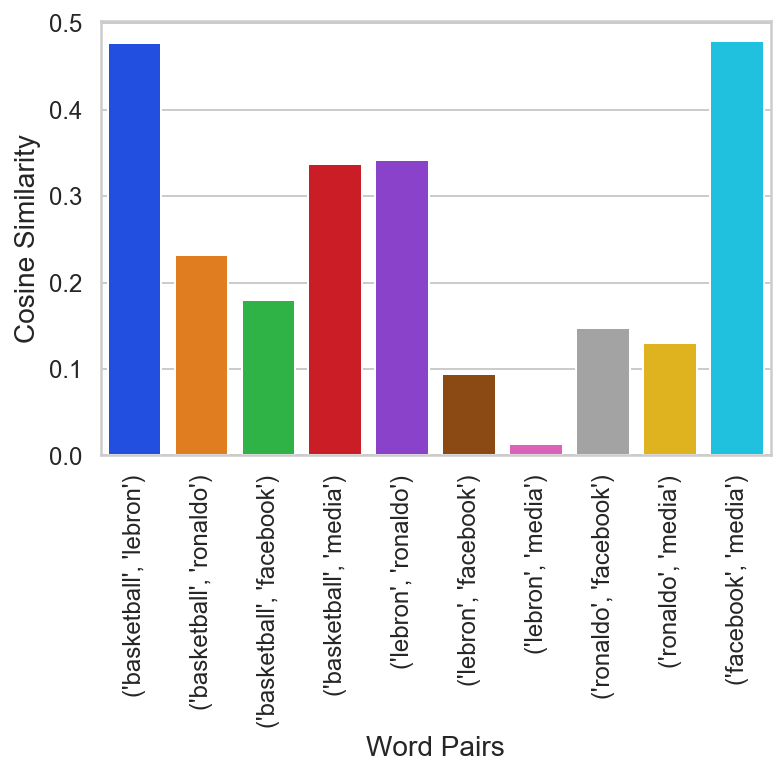

In [700]:
word_pairs = [(a, b) for idx, a in enumerate(words) for b in words[idx + 1:]]
cosine_sim_word_pairs = []
for word_pair in tqdm(word_pairs):
    cos_sim = cosine_similarity([model[word_pair[0]]], 
                                [model[word_pair[1]]])[0][0]
    cosine_sim_word_pairs.append([str(word_pair), "glove", cos_sim])
df_sim = pd.DataFrame(cosine_sim_word_pairs,
                      columns=['Word Pairs',
                               'Embedding',
                               'Cosine Similarity'])
f, ax = plt.subplots()
sns.barplot(x="Word Pairs", y="Cosine Similarity",
            data=df_sim[df_sim['Embedding'] == 'glove'], 
            ax=ax)
plt.xticks(rotation=90);
f.savefig("images/chapter_07_cosine_sim_glove.png", dpi=300, bbox_inches="tight")
f.savefig("images/chapter_07_cosine_sim_glove.pdf", format="pdf", dpi=300, bbox_inches="tight")

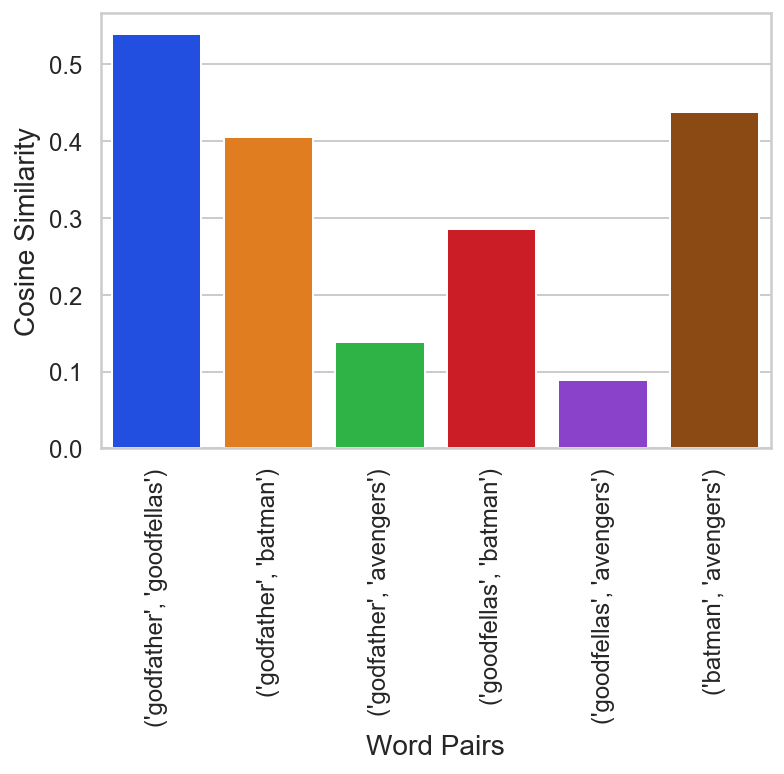

In [701]:
word_pairs = [(a, b) for idx, a in enumerate(movies) for b in movies[idx + 1:]]
cosine_sim_word_pairs = []
for word_pair in tqdm(word_pairs):
    cos_sim = cosine_similarity([model[word_pair[0]]], 
                                [model[word_pair[1]]])[0][0]
    cosine_sim_word_pairs.append([str(word_pair), "glove", cos_sim])
df_cosine_sim_word_pairs = pd.DataFrame(cosine_sim_word_pairs,
                                        columns=['Word Pairs',
                                                 'Embedding',
                                                 'Cosine Similarity'])
f, ax = plt.subplots()
sns.barplot(x="Word Pairs", y="Cosine Similarity",
            data=df_cosine_sim_word_pairs[df_cosine_sim_word_pairs['Embedding'] == 'glove'], 
            ax=ax)
plt.xticks(rotation=90);
f.savefig("images/chapter_07_cosine_sim_glove_movies.png", dpi=300, bbox_inches="tight")
f.savefig("images/chapter_07_cosine_sim_glove_movies.pdf", format="pdf", dpi=300, bbox_inches="tight")

# Extract Word Embeddings

In [289]:
viz_words = [sim_word_score[1] for sim_word_score in sim_words_scores]
main_words = [sim_word_score[0] for sim_word_score in sim_words_scores]

In [290]:
word_vectors = []
for word in tqdm(viz_words):
    word_vectors.append(model[word])
word_vectors = np.array(word_vectors)

# Visualize Word Embedding with PCA

In [422]:
pca_2d = PCA(n_components=2, 
             random_state=24).fit(word_vectors)
pca_wv_2d = pca_2d.transform(word_vectors)

In [423]:
pca_kwv_2d = {}
for idx, word in enumerate(viz_words):
    pca_kwv_2d[word] = pca_wv_2d[idx]

In [424]:
pca_2d.explained_variance_ratio_

array([0.2958635, 0.1937163], dtype=float32)

In [512]:
df_pca_2d = pd.DataFrame(pca_wv_2d, columns=['y', 'x'])
df_pca_2d['text'] = viz_words
df_pca_2d['word'] = main_words
df_pca_2d['size'] = 100

In [513]:
df_pca_2d.head()

,y,x,text,word,size
0,-0.578757,3.880173,basketball,basketball,100
1,-0.112564,4.062140,football,basketball,100
2,-0.285811,4.205854,hockey,basketball,100
3,-0.336747,3.135828,soccer,basketball,100
4,-1.141444,2.728284,nba,basketball,100


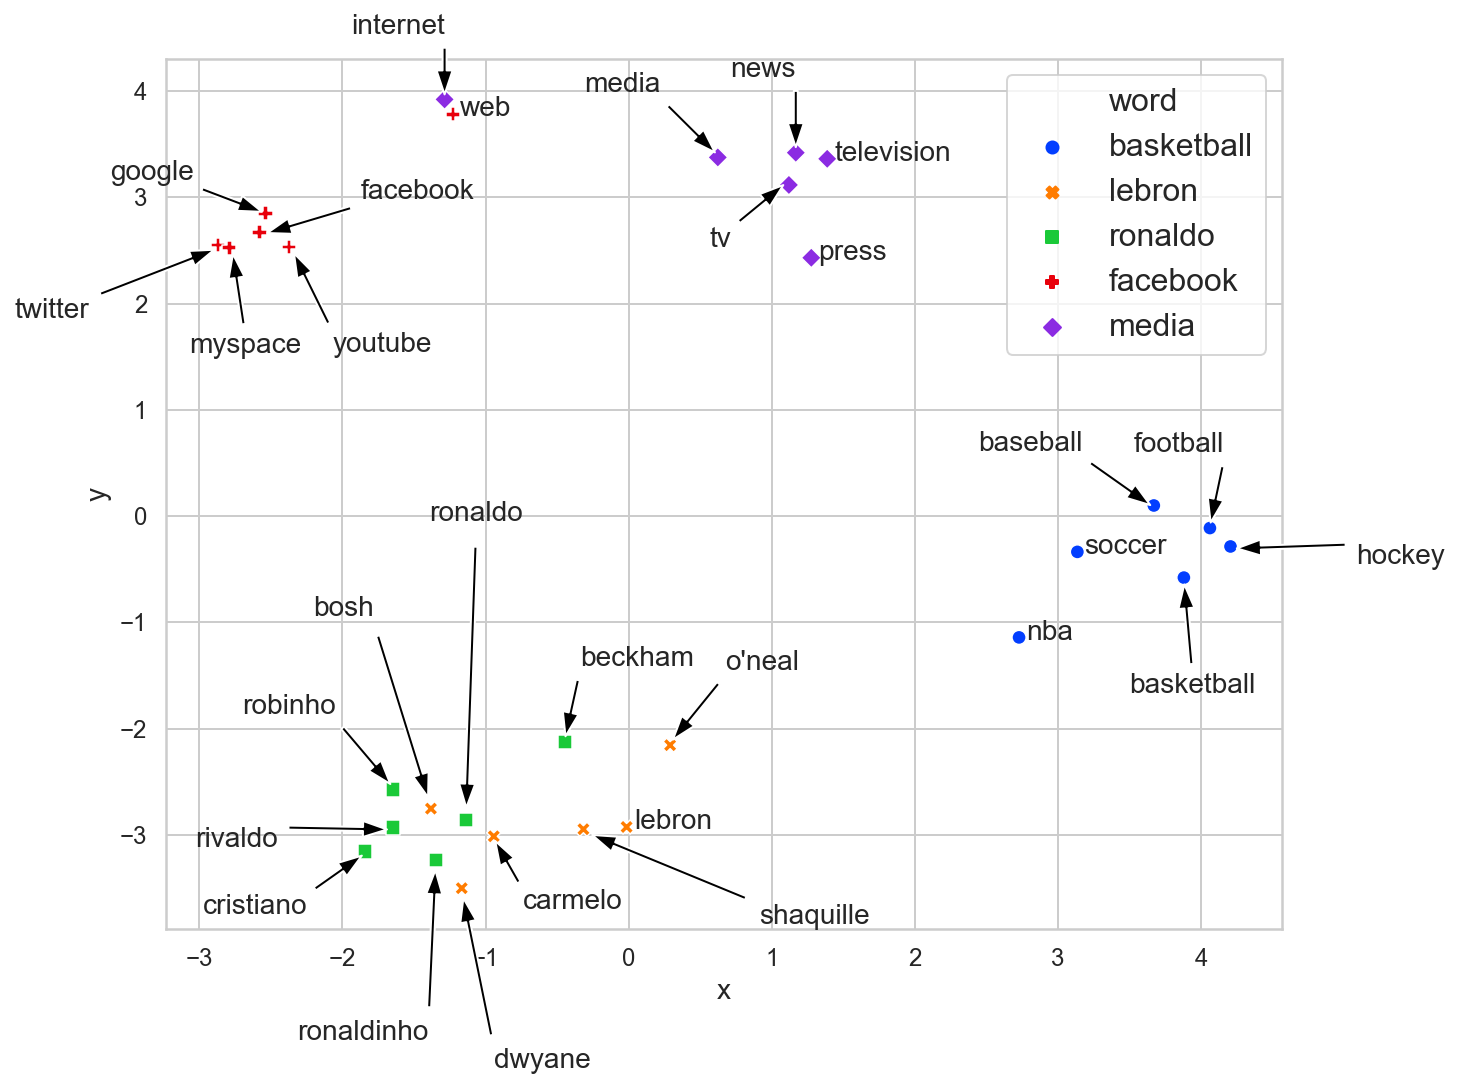

In [577]:
f, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df_pca_2d, 
                x="x", y="y", 
                hue="word", style="word", s=50, ax=ax)
headwidth=8
width=2
size=14
facecolor='black'
ax.legend(fontsize=size+2)
for i, row in df_pca_2d.iterrows():
    if row['text'] == 'google':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']-0.5, row['y']+0.5), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'facebook':
        ax.annotate(row['text'], xy=(row['x']+0.02, row['y']-0.02),  
                    xytext=(row['x']+1.5, row['y']+0.5), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'twitter':
        ax.annotate(row['text'], xy=(row['x']+0.02, row['y']-0.02),  
                    xytext=(row['x']-0.9, row['y']-0.5), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'myspace':
        ax.annotate(row['text'], xy=(row['x']+0.02, row['y']-0.02),  
                    xytext=(row['x']+0.5, row['y']-0.8), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'youtube':
        ax.annotate(row['text'], xy=(row['x']+0.02, row['y']-0.02),  
                    xytext=(row['x']+1, row['y']-0.8), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'internet':
        ax.annotate(row['text'], xy=(row['x'], row['y']+0.02),  
                    xytext=(row['x'], row['y']+0.8), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'media':
        ax.annotate(row['text'], xy=(row['x'], row['y']+0.02),  
                    xytext=(row['x']-0.4, row['y']+0.8), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'tv':
        ax.annotate(row['text'], xy=(row['x']-0.02, row['y']+0.02),  
                    xytext=(row['x']-0.4, row['y']-0.4), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'news':
        ax.annotate(row['text'], xy=(row['x'], row['y']+0.02),  
                    xytext=(row['x'], row['y']+0.9), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'beckham':
        ax.annotate(row['text'], xy=(row['x'], row['y']+0.02),  
                    xytext=(row['x']+0.9, row['y']+0.9), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'robinho':
        ax.annotate(row['text'], xy=(row['x'], row['y']+0.02),  
                    xytext=(row['x']-0.4, row['y']+0.9), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'o\'neal':
        ax.annotate(row['text'], xy=(row['x'], row['y']+0.02),  
                    xytext=(row['x']+0.9, row['y']+0.9), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'bosh':
        ax.annotate(row['text'], xy=(row['x'], row['y']+0.02),  
                    xytext=(row['x']-0.4, row['y']+2), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'rivaldo':
        ax.annotate(row['text'], xy=(row['x'], row['y']-0.02),  
                    xytext=(row['x']-0.8, row['y']), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'cristiano':
        ax.annotate(row['text'], xy=(row['x'], row['y']-0.02),  
                    xytext=(row['x']-0.4, row['y']-0.4), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'ronaldinho':
        ax.annotate(row['text'], xy=(row['x'], row['y']-0.02),  
                    xytext=(row['x']-0.05, row['y']-1.5), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'dwyane':
        ax.annotate(row['text'], xy=(row['x'], row['y']-0.02),  
                    xytext=(row['x']+0.9, row['y']-1.5), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'carmelo':
        ax.annotate(row['text'], xy=(row['x'], row['y']-0.02),  
                    xytext=(row['x']+0.9, row['y']-0.5), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'shaquille':
        ax.annotate(row['text'], xy=(row['x'], row['y']-0.02),  
                    xytext=(row['x']+2, row['y']-0.7), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'baseball':
        ax.annotate(row['text'], xy=(row['x'], row['y']-0.02),  
                    xytext=(row['x']-0.5, row['y']+0.7), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'football':
        ax.annotate(row['text'], xy=(row['x'], row['y']+0.02),  
                    xytext=(row['x']+0.1, row['y']+0.9), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'hockey':
        ax.annotate(row['text'], xy=(row['x'], row['y']-0.02),  
                    xytext=(row['x']+1.5, row['y']+0.02), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'basketball':
        ax.annotate(row['text'], xy=(row['x'], row['y']-0.02),  
                    xytext=(row['x']+0.5, row['y']-0.9), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'ronaldo':
        ax.annotate(row['text'], xy=(row['x'], row['y']-0.02),  
                    xytext=(row['x']+0.4, row['y']+3), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    else:
        ax.text(row['x']+.05, row['y']-0.02, str(row['text']),
            size=size)
    ax.text(row['x']+.05, row['y']-0.02, str(row['text']),
            size=size)
f.savefig("images/chapter_07_pca_glove.png", dpi=300, bbox_inches="tight")
f.savefig("images/chapter_07_pca_glove.pdf", format="pdf", dpi=300, bbox_inches="tight")

# Visualize Word Embeddings with t-SNE

In [406]:
perplexity = 10
learning_rate = 20
iteration = 1000
tsne_2d = TSNE(n_components=2, 
               random_state=24, 
               perplexity=perplexity,
               learning_rate=learning_rate, 
               n_iter=iteration).fit(word_vectors)
tnse_wv_2d = tsne_2d.fit_transform(word_vectors)

In [407]:
tsne_kwv_2d = {}
for idx, word in enumerate(viz_words):
    tsne_kwv_2d[word] = tnse_wv_2d[idx]

In [408]:
tsne_2d.kl_divergence_

0.03641778975725174

In [409]:
df_tsne_2d = pd.DataFrame(tnse_wv_2d, columns=['y', 'x'])
df_tsne_2d['text'] = viz_words
df_tsne_2d['word'] = main_words

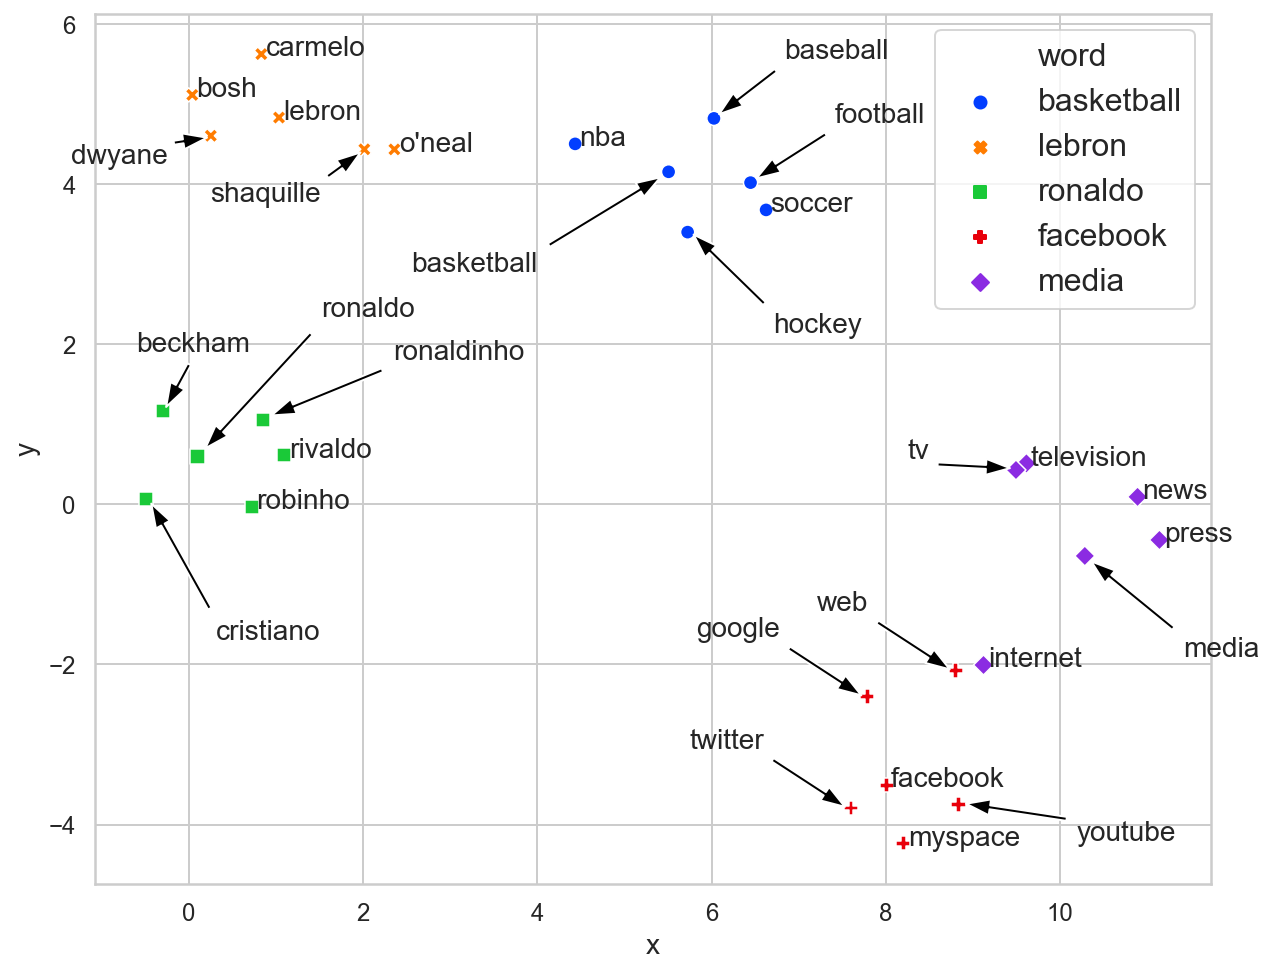

In [606]:
f, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df_tsne_2d, x="x", y="y", 
                hue="word", style="word", 
                s=50, ax=ax)
headwidth=8
width=2
size=14
facecolor='black'
ax.legend(fontsize=size+2)
for i, row in df_tsne_2d.iterrows():
    if row['text'] == 'dwyane':
        ax.annotate(row['text'], xy=(row['x']-0.02, row['y']-0.02),  
                    xytext=(row['x']-0.5, row['y']-0.1), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'shaquille':
        ax.annotate(row['text'], xy=(row['x']-0.02, row['y']-0.02),  
                    xytext=(row['x']-0.5, row['y']-0.4), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'baseball':
        ax.annotate(row['text'], xy=(row['x']+0.02, row['y']+0.02),  
                    xytext=(row['x']+2, row['y']+1), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'basketball':
        ax.annotate(row['text'], xy=(row['x']-0.02, row['y']-0.02),  
                    xytext=(row['x']-1.5, row['y']-1), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'football':
        ax.annotate(row['text'], xy=(row['x']+0.02, row['y']+0.02),  
                    xytext=(row['x']+2, row['y']+1), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'hockey':
        ax.annotate(row['text'], xy=(row['x']+0.02, row['y']+0.02),  
                    xytext=(row['x']+2, row['y']-1), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'beckham':
        ax.annotate(row['text'], xy=(row['x']+0.02, row['y']+0.02),  
                    xytext=(row['x']+1, row['y']+1), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'ronaldinho':
        ax.annotate(row['text'], xy=(row['x']+0.02, row['y']+0.02),  
                    xytext=(row['x']+3, row['y']+1), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'ronaldo':
        ax.annotate(row['text'], xy=(row['x']+0.02, row['y']+0.02),  
                    xytext=(row['x']+2.5, row['y']+2), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'cristiano':
        ax.annotate(row['text'], xy=(row['x']+0.02, row['y']+0.02),  
                    xytext=(row['x']+2, row['y']-1.5), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'tv':
        ax.annotate(row['text'], xy=(row['x']-0.02, row['y']+0.02),  
                    xytext=(row['x']-1, row['y']+0.4), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'media':
        ax.annotate(row['text'], xy=(row['x']+0.02, row['y']-0.02),  
                    xytext=(row['x']+2, row['y']-1), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'web':
        ax.annotate(row['text'], xy=(row['x']-0.02, row['y']-0.02),  
                    xytext=(row['x']-1, row['y']+1), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'google':
        ax.annotate(row['text'], xy=(row['x']-0.02, row['y']-0.02),  
                    xytext=(row['x']-1, row['y']+1), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'twitter':
        ax.annotate(row['text'], xy=(row['x']-0.02, row['y']-0.02),  
                    xytext=(row['x']-1, row['y']+1), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'youtube':
        ax.annotate(row['text'], xy=(row['x']+0.02, row['y']+0.02),  
                    xytext=(row['x']+2.5, row['y']-0.2), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    else:
        ax.text(row['x']+.05, row['y']-0.02, str(row['text']),
                size=size)
f.savefig("images/chapter_07_tsne_glove.png", dpi=300, bbox_inches="tight")
f.savefig("images/chapter_07_tsne_glove.pdf", format="pdf", dpi=300, bbox_inches="tight")

In [411]:
perplexity = 100
tsne_high_perp_2d = TSNE(n_components=2, 
               random_state=24, 
               perplexity=perplexity,
               learning_rate=learning_rate, 
               n_iter=iteration).fit(word_vectors)
tsne_high_perp_wv_2d = tsne_high_perp_2d.fit_transform(word_vectors)

In [412]:
tsne_high_perp_2d.kl_divergence_

2.5213392973455484e-07

In [413]:
tsne_high_perp_kwv_2d = {}
for idx, word in enumerate(viz_words):
    tsne_high_perp_kwv_2d[word] = tsne_high_perp_wv_2d[idx]

In [414]:
df_tsne_high_perp_2d = pd.DataFrame(tsne_high_perp_wv_2d, columns=['y', 'x'])
df_tsne_high_perp_2d['text'] = viz_words
df_tsne_high_perp_2d['word'] = main_words

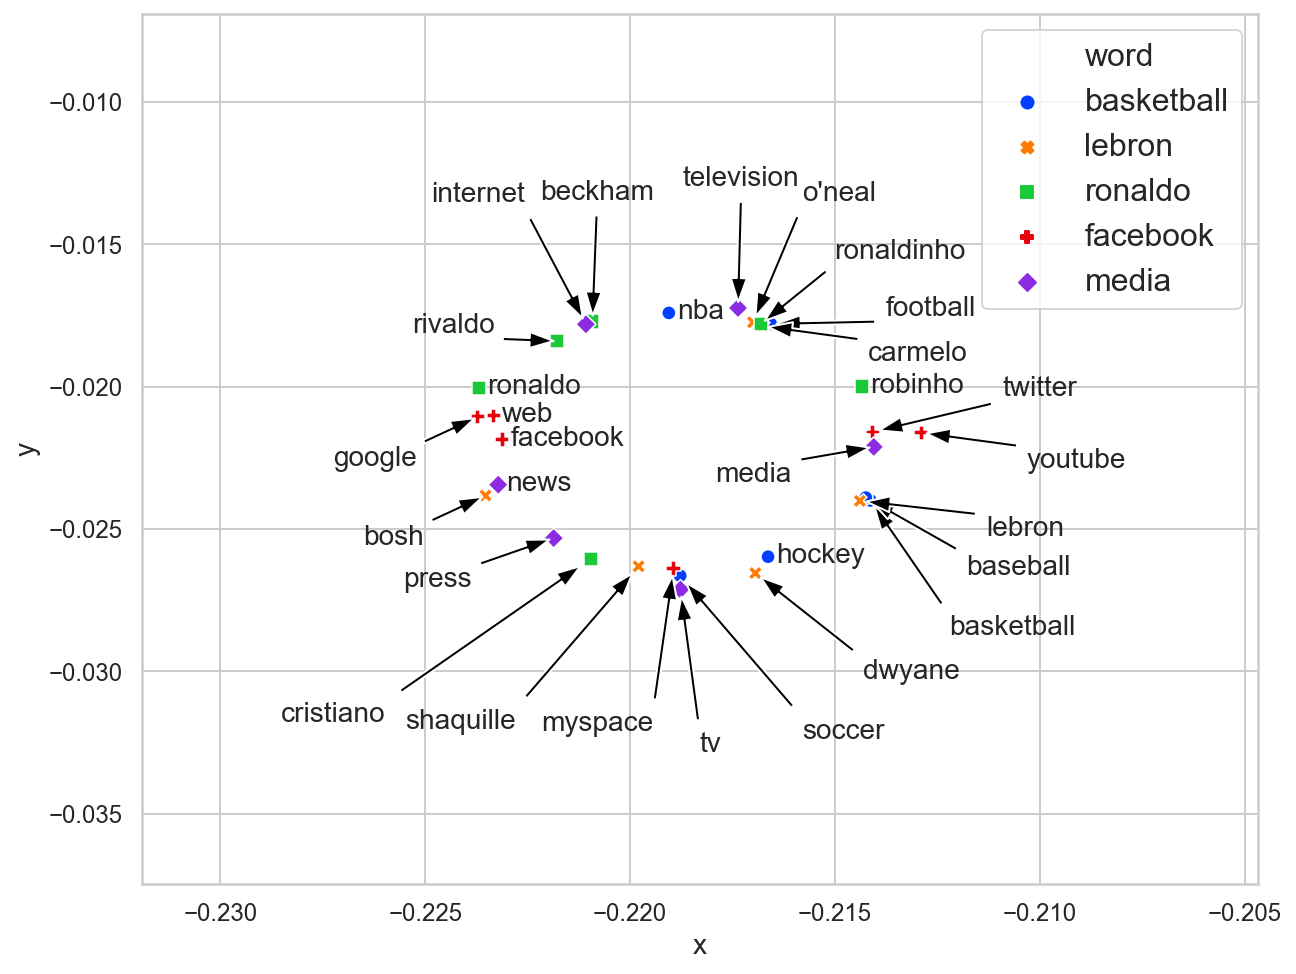

In [692]:
f, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df_tsne_high_perp_2d, x="x", y="y", 
                hue="word", style="word", 
                s=50, ax=ax)
headwidth=8
width=2
size=14
facecolor='black'
ax.legend(fontsize=size+2)
for i, row in df_tsne_high_perp_2d.iterrows():
    if row['text'] == 'google':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']-0.0015, row['y']-0.001), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'bosh':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']-0.0015, row['y']-0.001), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'beckham':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']+0.0015, row['y']+0.005), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'rivaldo':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']-0.0015, row['y']+0.001), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'internet':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']-0.0015, row['y']+0.005), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'television':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']+0.0015, row['y']+0.005), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'o\'neal':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']+0.003, row['y']+0.005), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'ronaldinho':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']+0.005, row['y']+0.003), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'football':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']+0.005, row['y']+0.001), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'carmelo':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']+0.005, row['y']-0.0005), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'twitter':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']+0.005, row['y']+0.002), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'youtube':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']+0.005, row['y']-0.0005), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'media':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']-0.002, row['y']-0.0005), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'basketball':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']+0.005, row['y']-0.004), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'baseball':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']+0.005, row['y']-0.002), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'lebron':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']+0.005, row['y']-0.0005), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'press':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']-0.002, row['y']-0.001), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'cristiano':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']-0.005, row['y']-0.005), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'shaquille':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']-0.003, row['y']-0.005), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'myspace':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']-0.0005, row['y']-0.005), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'tv':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']+0.001, row['y']-0.005), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'soccer':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']+0.005, row['y']-0.005), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    elif row['text'] == 'dwyane':
        ax.annotate(row['text'], xy=(row['x'], row['y']),  
                    xytext=(row['x']+0.005, row['y']-0.003), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    else:
        ax.text(row['x']+0.0002, row['y']-0.0002, str(row['text']),
                size=size)
f.savefig("images/chapter_07_tsne_high_perp_glove.png", dpi=300, bbox_inches="tight")
f.savefig("images/chapter_07_tsne_high_perp_glove.pdf", format="pdf", dpi=300, bbox_inches="tight")

# Cosine Similarity

Glove v/s PCA v/s t-SNE

In [428]:
word_pairs = [(a, b) for idx, a in enumerate(words) for b in words[idx + 1:]]

In [429]:
cosine_sim_word_pairs = []
for word_pair in tqdm(word_pairs):
    cos_sim = abs(cosine_similarity([model[word_pair[0]]], 
                                    [model[word_pair[1]]])[0][0])
    cosine_sim_word_pairs.append([str(word_pair), "glove", cos_sim])
for word_pair in tqdm(word_pairs):
    cos_sim = abs(cosine_similarity([pca_kwv_2d[word_pair[0]]], 
                                    [pca_kwv_2d[word_pair[1]]])[0][0])
    cosine_sim_word_pairs.append([str(word_pair), "PCA", cos_sim])
for word_pair in tqdm(word_pairs):
    cos_sim = abs(cosine_similarity([tsne_kwv_2d[word_pair[0]]], 
                                    [tsne_kwv_2d[word_pair[1]]])[0][0])
    cosine_sim_word_pairs.append([str(word_pair), "t-SNE", cos_sim])
for word_pair in tqdm(word_pairs):
    cos_sim = abs(cosine_similarity([tsne_high_perp_kwv_2d[word_pair[0]]], 
                                    [tsne_high_perp_kwv_2d[word_pair[1]]])[0][0])
    cosine_sim_word_pairs.append([str(word_pair), "t-SNE (High Perp.)", cos_sim])

In [430]:
df_cosine_sim_word_pairs = pd.DataFrame(cosine_sim_word_pairs,
                                        columns=['Word Pairs',
                                                 'Embedding',
                                                 'Cosine Similarity'])

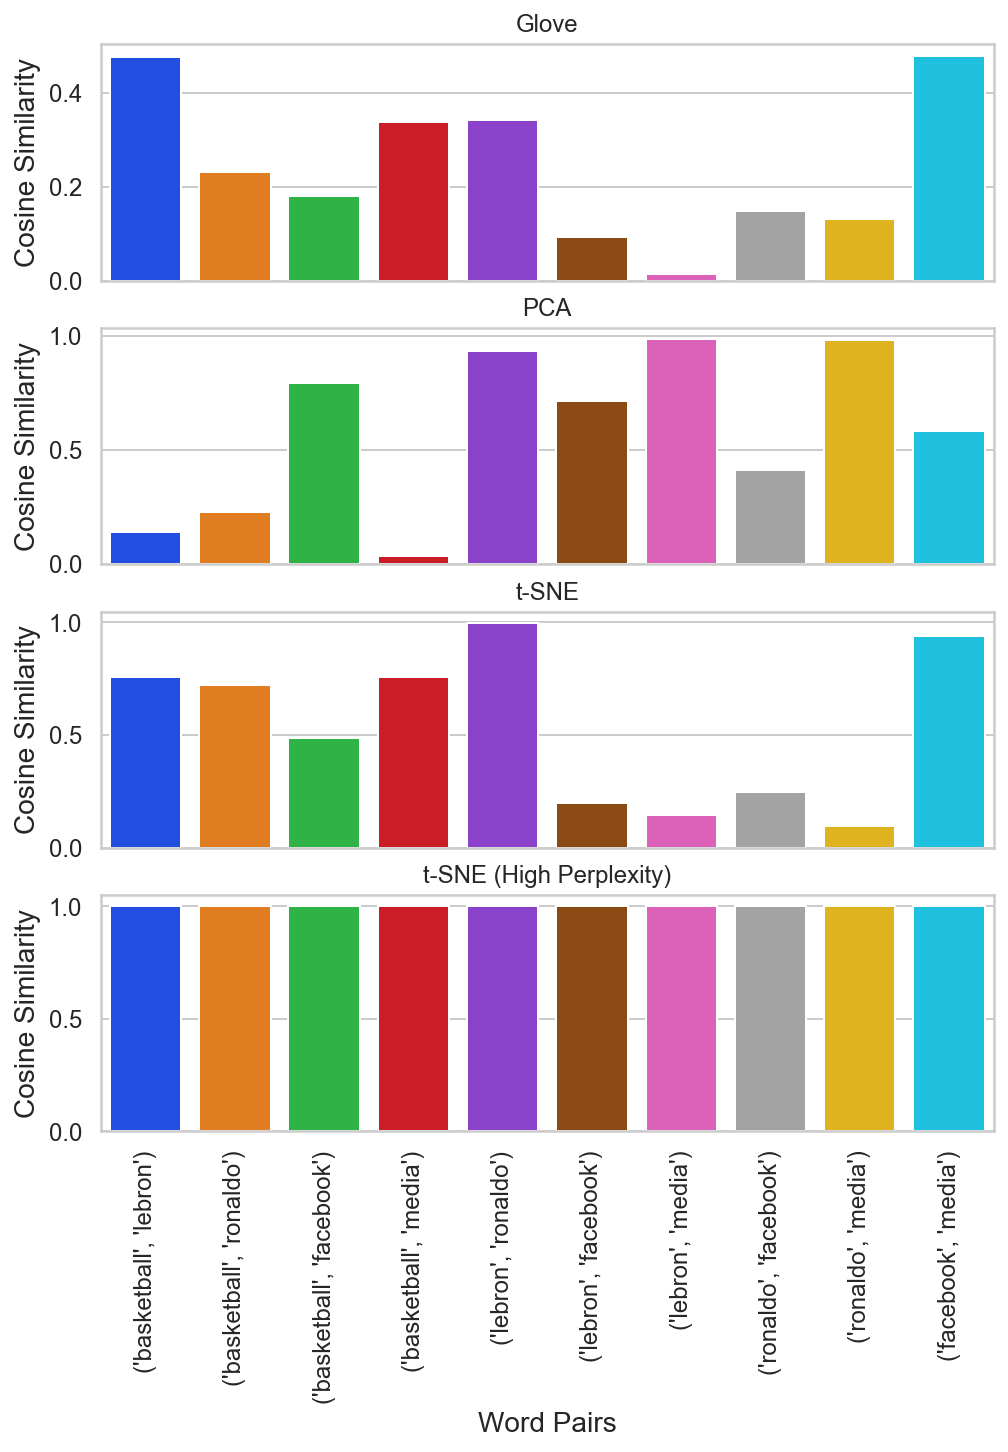

In [693]:
f, ax = plt.subplots(4, 1, figsize=(8, 10), sharex=True)
sns.barplot(x="Word Pairs", y="Cosine Similarity",
            data=df_cosine_sim_word_pairs[df_cosine_sim_word_pairs['Embedding'] == 'glove'], 
            ax=ax[0])
sns.barplot(x="Word Pairs", y="Cosine Similarity",
            data=df_cosine_sim_word_pairs[df_cosine_sim_word_pairs['Embedding'] == 'PCA'], 
            ax=ax[1])
sns.barplot(x="Word Pairs", y="Cosine Similarity",
            data=df_cosine_sim_word_pairs[df_cosine_sim_word_pairs['Embedding'] == 't-SNE'], 
            ax=ax[2])
sns.barplot(x="Word Pairs", y="Cosine Similarity",
            data=df_cosine_sim_word_pairs[df_cosine_sim_word_pairs['Embedding'] == 't-SNE (High Perp.)'], 
            ax=ax[3])
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[0].set_title('Glove')
ax[1].set_title('PCA')
ax[2].set_title('t-SNE')
ax[3].set_title('t-SNE (High Perplexity)')
plt.xticks(rotation=90);
f.savefig("images/chapter_07_cosine_sim_glove_pca_tsne.png", dpi=300, bbox_inches="tight")
f.savefig("images/chapter_07_cosine_sim_glove_pca_tsne.pdf", format="pdf", dpi=300, bbox_inches="tight")